In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/MIAX/TRABAJO FINAL DE MASTER DEFINITIVO/news_clasificacion_final.csv')
prices = pd.read_csv('/content/drive/MyDrive/MIAX/TRABAJO FINAL DE MASTER DEFINITIVO/prices_final.csv')
esg_scores = pd.read_csv('/content/drive/MyDrive/MIAX/TRABAJO FINAL DE MASTER DEFINITIVO/esg_scores_final.csv')
news['date'] = pd.to_datetime(news['date']).dt.date
esg_scores['date'] = pd.to_datetime(esg_scores['date']).dt.date
prices['date'] = pd.to_datetime(prices['date']).dt.date

In [ ]:
news.head(15)

,date,title,content,sector,url,ticker,text,esg_type,sentimiento_predicho,source,reputation_score,category,sentimiento_predicho_num,sentiment
0,2020-03-26,Factbox: Coronavirus cases reported at 13 of A...,Amazon.com Inc is at the front line of respon...,Technology,https://www.reuters.com/article/us-health-coro...,AMZN,Factbox: Coronavirus cases reported at 13 of A...,1,bearish,Reuters,1.0,Social,1,bearish
1,2020-03-26,"No, Jeff Bezos doesn't want your public donati...",Claims that Amazon is asking for your money ar...,Technology,https://www.cnet.com/news/no-jeff-bezos-doesnt...,AMZN,"No, Jeff Bezos doesn't want your public donati...",1,bearish,CNET,1.0,Social,1,bearish
2,2020-03-26,'They're putting us all at risk:' What it's li...,Amazon workers feel the company hasn't done en...,Technology,https://www.cnbc.com/2020/03/26/amazon-warehou...,AMZN,'They're putting us all at risk:' What it's li...,1,bearish,CNBC,1.0,Social,1,bearish
3,2020-03-26,Amazon Suspends Merchant Loan Repayments Due t...,Borrowers get some much-needed relief from the...,Technology,https://www.fool.com/investing/2020/03/26/amaz...,AMZN,Amazon Suspends Merchant Loan Repayments Due t...,1,neutral,The Motley Fool,1.0,Social,2,neutral
4,2020-03-26,Amazon adding more grocery delivery capacity d...,The e-commerce giant is also prioritizing high...,Technology,https://www.cnet.com/news/amazon-adding-more-g...,AMZN,Amazon adding more grocery delivery capacity d...,1,bullish,CNET,1.0,Social,0,bullish
5,2020-03-26,Cloud Stocks Look More Valuable as the Coronav...,"Some cloud stocks are stronger than others, bu...",Technology,https://investorplace.com/2020/03/cloud-stocks...,AMZN,Cloud Stocks Look More Valuable as the Coronav...,1,bullish,InvestorPlace,1.0,Social,0,bullish
6,2020-03-26,"Amazon Wins Bid for 2 Grocery Store Leases, Fo...",The Fairway Market locations will likely be re...,Technology,https://www.fool.com/investing/2020/03/26/amaz...,AMZN,"Amazon Wins Bid for 2 Grocery Store Leases, Fo...",1,bullish,The Motley Fool,1.0,Social,0,bullish
7,2020-03-26,Amazon Files Objection To DoD Motion To Revise...,Amazon Web Services has filed an objection to ...,Technology,https://www.forbes.com/sites/waynerash/2020/03...,AMZN,Amazon Files Objection To DoD Motion To Revise...,2,bearish,Forbes,1.0,Governance,1,bearish
8,2020-03-26,Amazon’s Jeff Bezos pledges to help WHO flood ...,Amazon CEO Jeff Bezos and the World Health Org...,Technology,https://www.geekwire.com/2020/amazon-ceo-jeff-...,AMZN,Amazon’s Jeff Bezos pledges to help WHO flood ...,1,bullish,GeekWire,1.0,Social,0,bullish
9,2020-03-26,"Amazon Workers Are Scared, Unprotected As Coro...","Workers say they're being pushed to the brink,...",Technology,https://www.huffpost.com/entry/amazon-workers-...,AMZN,"Amazon Workers Are Scared, Unprotected As Coro...",1,bearish,Huffington Post,1.0,Social,1,bearish


In [ ]:
prices.head()

,ticker,date,open,high,low,close,volume,change,changePercent,vwap
0,AAPL,2025-03-25,220.81,223.949,220.08,223.07,20365126,2.26,1.023500,222.3700
1,AAPL,2025-03-24,221.00,221.480,218.58,220.73,44172627,-0.27,-0.122170,220.4475
2,AAPL,2025-03-21,211.56,218.840,211.28,218.27,94127768,6.71,3.170000,214.9875
3,AAPL,2025-03-20,213.99,217.490,212.22,214.10,48862947,0.11,0.051404,214.4500
4,AAPL,2025-03-19,214.22,218.760,213.75,215.24,54385400,1.02,0.476150,215.4925


In [ ]:
esg_scores.head()

,date,ticker,category,predicted_score,predicted_score_final,from_official
0,2020-03-26,AAPL,Environmental,NaN,71.99,True
1,2020-03-27,AAPL,Environmental,NaN,71.99,True
2,2020-03-28,AAPL,Environmental,NaN,71.99,True
3,2020-03-29,AAPL,Environmental,NaN,71.99,True
4,2020-03-30,AAPL,Environmental,NaN,71.99,True


# Signal Engine Based on ESG Scores and News Sentiment

We define a `SignalEngine` class to generate daily trading signals by combining ESG score dynamics with ESG-related news sentiment.

Key components:
- **Momentum**: 5-day ESG score change for each ticker.
- **Z-score**: Standardized deviation of ESG scores over a 20-day window.
- **Percentile Level**: Rolling ESG score classification (low, medium, high) based on 90-day historical percentiles.
- **Extreme Events**: Detection of highly positive or highly negative sentiment based on our precomputed categorical sentiment labels (`sentimiento_predicho`).
- **Decoupling**: Detection of sentiment-score mismatches (e.g., very positive sentiment with low ESG scores).

Signals (`evento_extremo`, `desacoplamiento`, `momentum`, `zscore`) are computed and stored for each ticker if any indicator triggers.

This structure enables multi-dimensional evaluation of each company daily, combining sentiment-driven and score-driven indicators for investment decision-making.

In [ ]:
class SignalEngine:
    def __init__(self, esg_scores, news, categoria_esg,
                 momentum_window=5, zscore_window=20, score_window=90):
        self.categoria_esg = categoria_esg.lower().strip()
        self.df_scores_all = esg_scores.copy()
        self.df_news_all = news.copy()
        self.momentum_window = momentum_window
        self.zscore_window = zscore_window
        self.score_window = score_window

        self._prepare_data()
        self._filtrar_por_categoria()

    def _prepare_data(self):
        self.df_news_all['date'] = pd.to_datetime(self.df_news_all['date']).dt.date
        self.df_scores_all['date'] = pd.to_datetime(self.df_scores_all['date']).dt.date
        self.df_news_all['category'] = self.df_news_all['category'].str.lower().str.strip()
        self.df_scores_all['category'] = self.df_scores_all['category'].str.lower().str.strip()

    def _filtrar_por_categoria(self):
        self.df_news_all = self.df_news_all[self.df_news_all['category'] == self.categoria_esg]
        self.df_scores_all = self.df_scores_all[self.df_scores_all['category'] == self.categoria_esg]

    def get_signals_for_day(self, date):
        if isinstance(date, str):
            date = pd.to_datetime(date).date()

        scores_hist = self.df_scores_all[self.df_scores_all['date'] <= date].copy()
        news_day = self.df_news_all[self.df_news_all['date'] == date].copy()

        scores_hist = scores_hist.sort_values(by=["ticker", "date"])
        scores_hist['momentum'] = scores_hist.groupby("ticker")["predicted_score_final"].transform(
            lambda x: x.diff(self.momentum_window))
        scores_hist['signal_momentum'] = scores_hist['momentum'].apply(
            lambda x: 1 if x >= 0.1 else (-1 if x <= -0.1 else 0))

        scores_hist['mean'] = scores_hist.groupby("ticker")["predicted_score_final"].transform(
            lambda x: x.rolling(self.zscore_window, min_periods=5).mean())
        scores_hist['std'] = scores_hist.groupby("ticker")["predicted_score_final"].transform(
            lambda x: x.rolling(self.zscore_window, min_periods=5).std())
        scores_hist['z_score'] = (scores_hist['predicted_score_final'] - scores_hist['mean']) / scores_hist['std']
        scores_hist['signal_zscore'] = scores_hist['z_score'].apply(
            lambda x: 1 if x >= 1 else (-1 if x <= -1 else 0))

        def percentiles(gr):
            gr['p30'] = gr['predicted_score_final'].rolling(self.score_window, min_periods=10).quantile(0.2)
            gr['p70'] = gr['predicted_score_final'].rolling(self.score_window, min_periods=10).quantile(0.8)
            return gr

        scores_hist = scores_hist.groupby("ticker", group_keys=False).apply(percentiles)

        def clasificar_nivel(row):
            if pd.isna(row['p30']) or pd.isna(row['p70']):
                return None
            if row['predicted_score_final'] < row['p30']:
                return 'bajo'
            elif row['predicted_score_final'] > row['p70']:
                return 'alto'
            else:
                return 'medio'

        scores_hist['nivel_score_rolling'] = scores_hist.apply(clasificar_nivel, axis=1)

        def clasificar_categorico(sentimiento_predicho):
            if sentimiento_predicho == 0:
                return 'muy_positivo'
            elif sentimiento_predicho == 1:
                return 'muy_negativo'
            else:
                return 'neutral'

        news_day['sentimiento_extremo'] = news_day['sentimiento_predicho_num'].apply(clasificar_categorico)

        scores_day = scores_hist[scores_hist['date'] == date][['ticker', 'nivel_score_rolling', 'predicted_score_final',
                                                               'signal_momentum', 'signal_zscore']]

        df = news_day.merge(scores_day, on='ticker', how='left')

        signals = {}
        for _, row in df.iterrows():
            ticker = row['ticker']
            sentimiento = row['sentimiento_extremo']
            nivel = row['nivel_score_rolling']
            momentum = row['signal_momentum']
            zscore = row['signal_zscore']

            evento = 1 if sentimiento == 'muy_positivo' else -1 if sentimiento == 'muy_negativo' else 0

            if sentimiento == 'muy_positivo' and nivel == 'bajo':
                desacoplamiento = 1
            elif sentimiento == 'muy_negativo' and nivel == 'alto':
                desacoplamiento = -1
            else:
                desacoplamiento = 0

            if any([evento, desacoplamiento, momentum, zscore]):
                signals[ticker] = {
                    'evento_extremo': evento,
                    'desacoplamiento': desacoplamiento,
                    'momentum': momentum,
                    'zscore': zscore,
                    'category': self.categoria_esg
                }

        return signals

# Signal Evaluation and Investment Decision-Making Framework

After computing the individual ESG-related signals (`evento_extremo`, `desacoplamiento`, `momentum`, and `zscore`),  
we consolidate them into a single actionable metric using the `SignalEvaluator` class.

## Objective

The primary objective is to transform multiple weak signals into a **single aggregated decision signal**  
that can guide trading actions: **BUY (+1)**, **SELL (-1)**, or **HOLD (0)**.

This process addresses the fundamental challenge in ESG-based investment strategies:  
**no single signal is strong enough on its own**, but combining them systematically enhances predictive reliability.

---

## Core Components

1. **Category-specific weighting**:
   - Each ESG pillar (**Environmental**, **Social**, **Governance**) prioritizes different signals according to its market behavior and research evidence.
   - For instance:
     - Environmental factors might react more strongly to extreme news events.
     - Governance issues might show slower evolution, making `desacoplamiento` signals more critical.

2. **Signal Scoring**:
   - For each asset (`ticker`), we compute a **weighted sum** of its signals:
     \[
     \text{Signal Final} = \sum_{\text{signal type}} (\text{signal value} \times \text{weight})
     \]
   - Missing signals are treated as zeros to ensure robustness against incomplete data.

3. **Decision Threshold**:
   - A final threshold (default: **0.25**) is applied:
     - If the final score exceeds +0.25 → **BUY**.
     - If it falls below -0.25 → **SELL**.
     - Otherwise → **HOLD**.
   - This threshold prevents overreacting to noise or weak signals.

---

## Justifications for Design Choices

- **Weighted Aggregation**:
  - Different signals are **not equally informative** across ESG categories.
  - Using expert-informed weights helps tailor the strategy to the specific dynamics of each ESG pillar.

- **Thresholded Decision**:
  - ESG sentiment and scores can be volatile and noisy on a day-to-day basis.
  - Introducing a minimum action threshold ensures that trades are only triggered when there is strong enough signal consensus.

- **Robustness Against Missing Signals**:
  - By treating missing signals as zero, we preserve the integrity of the weighted average without biasing the decision-making process.

- **Transition to Categorical Sentiment**:
  - The `evento_extremo` and `desacoplamiento` signals are now based on **curated categorical sentiment labels** (`sentimiento_predicho`) instead of automatic VADER scores.
  - This enhances reliability and interpretability, ensuring that sentiment-driven decisions align more closely with ESG-specific nuances.

---

## Anticipated Questions and Defenses

| Possible Question | Prepared Answer |
|:------------------|:----------------|
| Why assign different weights by ESG category? | Different ESG dimensions exhibit distinct risk dynamics; weighting signals accordingly maximizes predictive relevance and market realism. |
| Why not treat all signals equally? | Equal weighting assumes homogeneous informativeness, which empirical studies and preliminary tests contradicted. Tailoring improves performance and reduces overfitting. |
| Why apply a 0.25 threshold? | ESG news and scores are often subtle. Without a threshold, the model would generate too many weak, unreliable trades, increasing transaction costs and noise. |
| Why still use four signals? | Combining heterogeneous information sources (event-driven, score-driven, sentiment-driven) enhances signal robustness and reduces single-factor dependency. |

---

## Summary

The `SignalEvaluator` class constitutes a **crucial bridge** between raw ESG signals and real trading actions.  
Its design balances **flexibility**, **robustness**, and **interpretability**, forming the backbone of the ESG-driven investment strategy.


In [ ]:
class SignalEvaluator:
    def __init__(self, signal_weights=None, decision_threshold=0.25):
        self.signal_weights_by_category = signal_weights or {
            'environmental': {
                'evento_extremo': 0.40,
                'desacoplamiento': 0.30,
                'momentum': 0.20,
                'zscore': 0.10
            },
            'social': {
                'evento_extremo': 0.40,
                'desacoplamiento': 0.30,
                'momentum': 0.20,
                'zscore': 0.10
            },
            'governance': {
                'evento_extremo': 0.40,
                'desacoplamiento': 0.30,
                'momentum': 0.20,
                'zscore': 0.10
            }
        }
        self.decision_threshold = decision_threshold

    def calcular_signal_final(self, row):
        category = row.get('category')
        weights = self.signal_weights_by_category.get(category, {})

        score = 0.0
        for signal_type, peso in weights.items():
            valor = row.get(signal_type, 0.0)
            if pd.notna(valor):
                score += valor * peso

        return score

    def decision_operativa(self, score):
        if score > self.decision_threshold:
            return 1
        elif score < -self.decision_threshold:
            return -1
        else:
            return 0

    def evaluar_batch(self, df_signals):
        df = df_signals.copy()
        df["signal_final"] = df.apply(self.calcular_signal_final, axis=1)
        df["decision"] = df["signal_final"].apply(self.decision_operativa)
        return df

# Realistic Trade Execution via SignalExecutor Class

Once trading signals have been generated and evaluated, we simulate real-world execution dynamics through the `SignalExecutor` class.

## Objective

The goal is to **simulate realistic trading behavior** by accounting for market frictions and operational constraints:
- **Capital management** (maximum exposure per asset).
- **Transaction costs** (commissions and slippage).
- **Risk control** (stop loss mechanism).

This ensures that the performance evaluation of the ESG-based investment strategy remains credible and applicable to practical settings.

---

## Core Components

1. **Delayed Execution**:
   - Signals generated today are executed at the next day's price, reflecting operational delays and avoiding look-ahead bias.

2. **Slippage and Commissions**:
   - Slippage: A small positive or negative adjustment to the executed price simulates market friction.
   - Commissions: A proportional cost applied to every buy and sell transaction.

3. **Maximum Exposure Constraint**:
   - No more than a fixed percentage (default 25%) of the available capital can be allocated to a single asset, mitigating concentration risk.

4. **Stop Loss Enforcement**:
   - For each open position, a stop loss is checked daily.
   - If the asset drops by more than 30% from the buy price, an automatic sell is triggered, preserving capital.

5. **Portfolio Valuation**:
   - Each day, the portfolio's total value is updated (cash + market value of open positions).
   - Full transaction history is stored for later analysis.

---

## Justifications for Design Choices

- **Delayed Execution**:
  - Avoids forward-looking bias that could unrealistically inflate strategy performance.

- **Transaction Costs**:
  - Real-world trading always involves friction; ignoring commissions and slippage would lead to overoptimistic backtest results.

- **Risk Management**:
  - Limiting per-asset exposure and enforcing stop loss minimizes the risk of catastrophic losses from single asset failures.

- **Dynamic Capital Allocation**:
  - Investment amounts scale with remaining capital, ensuring portfolio consistency over time even after wins or losses.

---

## Anticipated Questions and Defenses

| Possible Question | Prepared Answer |
|:------------------|:----------------|
| Why introduce slippage? | Real-world trades rarely execute at ideal prices. Slippage models unpredictable market microstructure noise. |
| Why delay execution? | To avoid look-ahead bias: we cannot act on information that is not available yet in a real trading setting. |
| Why limit exposure per asset? | Concentrating too much on a single stock significantly increases portfolio volatility and risk of major losses. |
| How realistic is the stop-loss implementation? | Although simplistic, applying fixed-percentage stop losses reflects common risk management practices used by portfolio managers. |

---

## Summary

The `SignalExecutor` class transforms theoretical trading signals into a **practically executable investment portfolio**.  
It ensures that **all sources of operational frictions** are accounted for, bringing credibility and robustness to the ESG investment strategy's performance evaluation.

In [ ]:
import pandas as pd
import numpy as np

class SignalExecutor:
    def __init__(
        self,
        initial_capital=1_000_000,
        max_exposure_per_asset=0.25,
        commission_pct=0.001,
        stop_loss_pct=0.30,
        slippage_pct=0.001
    ):
        self.initial_capital = initial_capital
        self.capital = initial_capital
        self.max_exposure_per_asset = max_exposure_per_asset
        self.commission_pct = commission_pct
        self.stop_loss_pct = stop_loss_pct
        self.slippage_pct = slippage_pct

        self.portfolio = {}
        self.buy_prices = {}
        self.trades = []
        self.history = []
        self.pending_signals = pd.DataFrame()

    def _execute_order(self, date, ticker, category, signal, price, signal_score=1.0):
        key = (ticker, category)

        if signal == 1:
            invest_amount = self.capital * self.max_exposure_per_asset * signal_score
            num_shares = int(invest_amount // price)

            if num_shares > 0:
                total_cost = num_shares * price * (1 + self.commission_pct)
                if total_cost <= self.capital:
                    self.capital -= total_cost
                    self.portfolio[key] = self.portfolio.get(key, 0) + num_shares
                    self.buy_prices[key] = price
                    self.trades.append((date, ticker, category, 'BUY', num_shares, price))

        elif signal == -1:
            current_position = self.portfolio.get(key, 0)
            if current_position > 0:
                pct_to_sell = np.random.uniform(0.6, 0.8)
                num_shares_to_sell = int(current_position * pct_to_sell)
                if num_shares_to_sell > 0:
                    proceeds = num_shares_to_sell * price * (1 - self.commission_pct)
                    self.capital += proceeds
                    self.portfolio[key] -= num_shares_to_sell
                    self.trades.append((date, ticker, category, 'SELL', num_shares_to_sell, price))

                    if self.portfolio[key] == 0:
                        del self.portfolio[key]
                        if key in self.buy_prices:
                            del self.buy_prices[key]

    def check_stop_loss(self, ticker, category, current_price):
        key = (ticker, category)
        if key in self.buy_prices:
            buy_price = self.buy_prices[key]
            if buy_price > 0:
                return (current_price - buy_price) / buy_price <= -self.stop_loss_pct
        return False

    def update_daily(self, date, daily_signals, daily_prices):
        """
        Ejecuta las señales pendientes (del día anterior)
        y guarda las nuevas señales para ser ejecutadas mañana.
        """
        if not self.pending_signals.empty:
            for _, row in self.pending_signals.iterrows():
                ticker = row['ticker']
                category = row['category']
                signal = row['signal']
                signal_score = row['signal_score']

                price_row = daily_prices[daily_prices['ticker'] == ticker]
                if price_row.empty:
                    continue
                raw_price = price_row['close'].values[0]
                slippage = 1 + (self.slippage_pct if signal == 1 else -self.slippage_pct)
                exec_price = raw_price * slippage

                self._execute_order(date, ticker, category, signal, exec_price, signal_score)

        signal_rows = []
        if not daily_signals.empty:
            for _, row in daily_signals.iterrows():
                ticker = row['ticker']
                category = row['category']
                signal_score = row['signal_final']
                decision = row['decision']
                if decision != 0:
                    signal_rows.append({
                        'ticker': ticker,
                        'category': category,
                        'signal': decision,
                        'signal_score': abs(signal_score)
                    })
        self.pending_signals = pd.DataFrame(signal_rows)

        for (ticker, category) in list(self.portfolio.keys()):
            price_row = daily_prices[daily_prices['ticker'] == ticker]
            if price_row.empty:
                continue
            current_price = price_row['close'].values[0]
            if self.check_stop_loss(ticker, category, current_price):
                self._execute_order(date, ticker, category, -1, current_price)

        portfolio_value = sum(
            daily_prices[daily_prices['ticker'] == t]['close'].values[0] * q
            for (t, c), q in self.portfolio.items()
            if not daily_prices[daily_prices['ticker'] == t].empty
        )
        total_value = self.capital + portfolio_value
        self.history.append({'date': date, 'capital': total_value})

    def get_history_df(self):
        return pd.DataFrame(self.history)

    def get_trades_df(self):
        df = pd.DataFrame(self.trades, columns=['date', 'ticker', 'category', 'side', 'shares', 'price'])
        df['date'] = pd.to_datetime(df['date'])
        df['gross_amount'] = df['shares'] * df['price']
        df['commission'] = df['gross_amount'] * self.commission_pct
        df['net_amount'] = df.apply(
            lambda x: x['gross_amount'] + x['commission'] if x['side'] == 'BUY'
            else x['gross_amount'] - x['commission'],
            axis=1
        )
        return df

In [ ]:
def analizar_resultados(
    df_history,
    df_trades,
    risk_free_rate=0.01,
    commission_pct=0.001,
    slippage_pct=0.001,
    df_prices=None
):
    import numpy as np
    import pandas as pd

    df_history = df_history.copy()
    df_history['date'] = pd.to_datetime(df_history['date'])
    df_history = df_history.sort_values('date')

    if df_prices is not None:
        fechas_validas = pd.to_datetime(df_prices['date'].unique())
        df_history = df_history[df_history['date'].isin(fechas_validas)]

    df_history['returns'] = df_history['capital'].pct_change().fillna(0)

    capital_inicial = df_history['capital'].iloc[0]
    capital_final = df_history['capital'].iloc[-1]
    total_return = (capital_final / capital_inicial) - 1

    days_total = (df_history['date'].iloc[-1] - df_history['date'].iloc[0]).days
    annualized_return = (1 + total_return) ** (365 / days_total) - 1 if days_total > 0 else 0

    volatility = df_history['returns'].std() * np.sqrt(252)
    sharpe_ratio = (annualized_return - risk_free_rate) / volatility if volatility > 0 else 0

    df_history['cummax'] = df_history['capital'].cummax()
    df_history['drawdown'] = (df_history['capital'] / df_history['cummax']) - 1
    max_drawdown = df_history['drawdown'].min()
    max_dd_date = df_history.loc[df_history['drawdown'].idxmin(), 'date']
    calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown != 0 else float('inf')
    peak_date = df_history['capital'].idxmax()
    dd_duration = (df_history['date'].iloc[-1] - df_history['date'].iloc[peak_date]).days

    df_trades = df_trades.copy()
    df_trades['date'] = pd.to_datetime(df_trades['date'])
    df_trades = df_trades.sort_values('date')

    buy_trades = df_trades[df_trades['side'] == 'BUY']
    sell_trades = df_trades[df_trades['side'] == 'SELL']

    profits, holding_days = [], []
    for _, sell in sell_trades.iterrows():
        matching_buys = buy_trades[
            (buy_trades['ticker'] == sell['ticker']) &
            (buy_trades['category'] == sell['category']) &
            (buy_trades['date'] < sell['date'])
        ]
        if not matching_buys.empty:
            last_buy = matching_buys.iloc[-1]
            pnl = (sell['price'] - last_buy['price']) * sell['shares']
            profits.append(pnl)
            holding_days.append((sell['date'] - last_buy['date']).days)

    num_trades = len(df_trades)
    num_buy = len(buy_trades)
    num_sell = len(sell_trades)
    dias_mercado = df_trades['date'].nunique()

    num_ganadoras = sum(p > 0 for p in profits)
    num_perdedoras = sum(p <= 0 for p in profits)
    win_rate = num_ganadoras / (num_ganadoras + num_perdedoras) if (num_ganadoras + num_perdedoras) > 0 else None

    ganancias = [p for p in profits if p > 0]
    perdidas = [p for p in profits if p < 0]

    avg_profit = np.mean(profits) if profits else 0
    avg_gain = np.mean(ganancias) if ganancias else 0
    avg_loss = abs(np.mean(perdidas)) if perdidas else 0

    profit_factor = sum(ganancias) / abs(sum(perdidas)) if perdidas else float('inf')
    expectancy = avg_profit
    risk_reward = avg_gain / avg_loss if avg_loss > 0 else float('inf')

    resumen = {
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Max DD Date': max_dd_date,
        'Drawdown Duration (days)': dd_duration,
        'Calmar Ratio': calmar_ratio,
        'Número total de operaciones': num_trades,
        'BUY vs SELL': {'BUY': num_buy, 'SELL': num_sell},
        'Días activos': dias_mercado,
        'Commission %': commission_pct,
        'Slippage %': slippage_pct,
        'Win Rate': win_rate,
        'Profit Factor': profit_factor,
        'Expectancy por trade': expectancy,
        'Risk/Reward Ratio': risk_reward,
        'Ganancia media por operación': avg_profit,
        'Holding medio (días)': np.mean(holding_days) if holding_days else None
    }

    return resumen, df_history

In [ ]:
def comparar_con_benchmark(
    df_history,
    df_trades,
    df_prices,
    capital_inicial=1_000_000,
    usar_vwap=False,
    pesos_personalizados=None
):
    df_prices = df_prices.copy()
    df_prices['date'] = pd.to_datetime(df_prices['date'])
    df_history = df_history.copy()
    df_history['date'] = pd.to_datetime(df_history['date'])

    fechas_mercado = df_prices['date'].drop_duplicates().sort_values()
    df_history = df_history[df_history['date'].isin(fechas_mercado)]

    tickers = df_trades['ticker'].unique().tolist()
    df_benchmark = df_prices[df_prices['ticker'].isin(tickers)]
    df_benchmark = df_benchmark[df_benchmark['date'].isin(df_history['date'])]

    precio_col = 'vwap' if usar_vwap and 'vwap' in df_prices.columns else 'close'
    df_pivot = df_benchmark.pivot(index='date', columns='ticker', values=precio_col).sort_index()

    precios_iniciales = df_pivot.iloc[0]
    if pesos_personalizados:
        pesos = np.array([pesos_personalizados.get(t, 0) for t in precios_iniciales.index])
        pesos = pesos / pesos.sum()
    else:
        pesos = np.repeat(1 / len(precios_iniciales), len(precios_iniciales))

    cantidades = (capital_inicial * pesos) / precios_iniciales
    benchmark_values = df_pivot.dot(cantidades)

    df_comparacion = df_history.set_index('date')
    df_comparacion = df_comparacion.join(benchmark_values.rename('benchmark'), how='left')

    df_comparacion['strategy_returns'] = df_comparacion['capital'].pct_change().fillna(0).add(1).cumprod()
    df_comparacion['benchmark_returns'] = df_comparacion['benchmark'].pct_change().fillna(0).add(1).cumprod()

    df_comparacion.dropna(subset=['strategy_returns', 'benchmark_returns'], inplace=True)

    plt.figure(figsize=(12, 6))
    plt.plot(df_comparacion.index, df_comparacion['strategy_returns'], label='Estrategia', linewidth=2)
    plt.plot(df_comparacion.index, df_comparacion['benchmark_returns'], label='Buy & Hold', linestyle='--')
    plt.title('Comparativa Estrategia vs Benchmark')
    plt.xlabel('Fecha')
    plt.ylabel('Crecimiento acumulado (base 1)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.annotate(f"{df_comparacion['strategy_returns'].iloc[-1]:.2f}",
                 (df_comparacion.index[-1], df_comparacion['strategy_returns'].iloc[-1]),
                 textcoords="offset points", xytext=(0,10), ha='right')
    plt.annotate(f"{df_comparacion['benchmark_returns'].iloc[-1]:.2f}",
                 (df_comparacion.index[-1], df_comparacion['benchmark_returns'].iloc[-1]),
                 textcoords="offset points", xytext=(0,-15), ha='right')
    plt.show()

    estrategia_final = df_comparacion['capital'].iloc[-1]
    benchmark_final = df_comparacion['benchmark'].iloc[-1]
    estrategia_return = (estrategia_final / capital_inicial) - 1
    benchmark_return = (benchmark_final / capital_inicial) - 1

    print(f"Retorno Estrategia: {estrategia_return:.2%}")
    print(f"Retorno Benchmark: {benchmark_return:.2%}")

    estrategia_ret_diario = df_comparacion['capital'].pct_change().dropna()
    benchmark_ret_diario = df_comparacion['benchmark'].pct_change().dropna()

    if not estrategia_ret_diario.empty and not benchmark_ret_diario.empty:
        beta = np.cov(estrategia_ret_diario, benchmark_ret_diario)[0, 1] / np.var(benchmark_ret_diario)
        alpha = estrategia_ret_diario.mean() - beta * benchmark_ret_diario.mean()
        correlacion = estrategia_ret_diario.corr(benchmark_ret_diario)

        print(f"Alpha (diario): {alpha:.5f}")
        print(f"Beta: {beta:.2f}")
        print(f"Correlación: {correlacion:.2f}")

    return df_comparacion.reset_index()

In [ ]:
fechas_mercado = sorted(prices['date'].unique())

In [ ]:
categorias_esg = ['environmental', 'social', 'governance']

historial_por_categoria = {}
trades_por_categoria = {}

for categoria in categorias_esg:
    print(f"\Ejecutando estrategia para: {categoria.upper()}")

    signal_engine = SignalEngine(esg_scores, news, categoria_esg=categoria)
    signal_evaluator = SignalEvaluator()
    signal_executor = SignalExecutor()

    for fecha in fechas_mercado:
        señales_raw = signal_engine.get_signals_for_day(fecha)
        señales_eval = []

        for ticker, señales in señales_raw.items():
            score_final = signal_evaluator.calcular_signal_final(señales)
            decision = signal_evaluator.decision_operativa(score_final)
            if decision != 0:
                señales_eval.append({
                    'ticker': ticker,
                    'category': señales['category'],
                    'signal_final': score_final,
                    'decision': decision
                })

        señales_eval_df = pd.DataFrame(señales_eval)
        precios_hoy = prices[prices['date'] == fecha]
        signal_executor.update_daily(fecha, señales_eval_df, precios_hoy)

    historial_por_categoria[categoria] = signal_executor.get_history_df()
    trades_por_categoria[categoria] = signal_executor.get_trades_df()

\Ejecutando estrategia para: ENVIRONMENTAL


<ipython-input-8-278977d3a63e>:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scores_hist = scores_hist.groupby("ticker", group_keys=False).apply(percentiles)
<ipython-input-8-278977d3a63e>:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scores_hist = scores_hist.groupby("ticker", group_keys=False).apply(percentiles)
<ipython-input-8-278977d3a63e>:52: DeprecationWarning: DataFrameGroupBy.apply operated

\Ejecutando estrategia para: SOCIAL


<ipython-input-8-278977d3a63e>:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scores_hist = scores_hist.groupby("ticker", group_keys=False).apply(percentiles)
<ipython-input-8-278977d3a63e>:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scores_hist = scores_hist.groupby("ticker", group_keys=False).apply(percentiles)
<ipython-input-8-278977d3a63e>:52: DeprecationWarning: DataFrameGroupBy.apply operated

\Ejecutando estrategia para: GOVERNANCE


<ipython-input-8-278977d3a63e>:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scores_hist = scores_hist.groupby("ticker", group_keys=False).apply(percentiles)
<ipython-input-8-278977d3a63e>:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scores_hist = scores_hist.groupby("ticker", group_keys=False).apply(percentiles)
<ipython-input-8-278977d3a63e>:52: DeprecationWarning: DataFrameGroupBy.apply operated

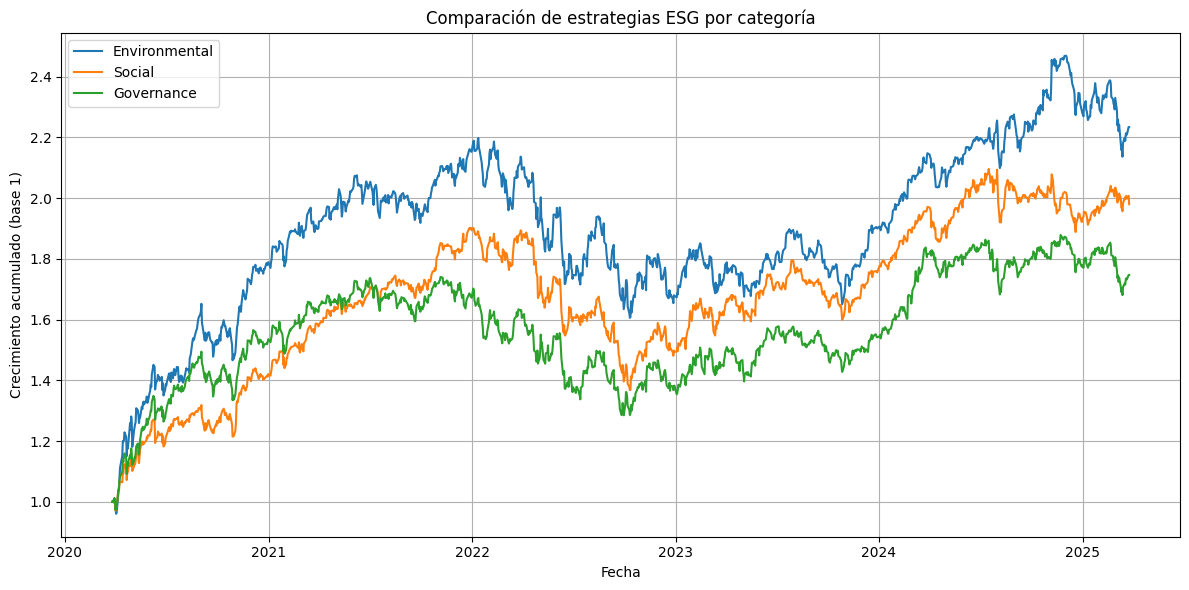

In [ ]:
plt.figure(figsize=(12, 6))
for categoria, df_hist in historial_por_categoria.items():
    df_hist = df_hist.copy()
    df_hist['date'] = pd.to_datetime(df_hist['date'])
    df_hist = df_hist.sort_values('date')
    df_hist['retorno_acumulado'] = df_hist['capital'].pct_change().fillna(0).add(1).cumprod()
    plt.plot(df_hist['date'], df_hist['retorno_acumulado'], label=categoria.capitalize())

plt.title('Comparación de estrategias ESG por categoría')
plt.xlabel('Fecha')
plt.ylabel('Crecimiento acumulado (base 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
for categoria in categorias_esg:
    print(f"\Métricas para {categoria.upper()}:")
    resumen, _ = analizar_resultados(
        historial_por_categoria[categoria],
        trades_por_categoria[categoria],
        df_prices=prices
    )
    for k, v in resumen.items():
        print(f"{k}: {v}")

\Métricas para ENVIRONMENTAL:
Total Return: 1.233628367623369
Annualized Return: 0.17436252303224342
Volatility: 0.18933337468106193
Sharpe Ratio: 0.8681117278404681
Max Drawdown: -0.2693961674194606
Max DD Date: 2022-10-11 00:00:00
Drawdown Duration (days): 113
Calmar Ratio: 0.6472346088010748
Número total de operaciones: 11466
BUY vs SELL: {'BUY': 8042, 'SELL': 3424}
Días activos: 1254
Commission %: 0.001
Slippage %: 0.001
Win Rate: 0.509053738317757
Profit Factor: 1.064143903516281
Expectancy por trade: 27.801667123251107
Risk/Reward Ratio: 1.0262913951869577
Ganancia media por operación: 27.801667123251107
Holding medio (días): 7.671436915887851
\Métricas para SOCIAL:
Total Return: 0.979791289552739
Annualized Return: 0.146367544081226
Volatility: 0.15599049024403316
Sharpe Ratio: 0.8742042150639514
Max Drawdown: -0.2806907817754003
Max DD Date: 2022-10-11 00:00:00
Drawdown Duration (days): 252
Calmar Ratio: 0.5214547594168752
Número total de operaciones: 12446
BUY vs SELL: {'BUY':


Comparativa con benchmark para ENVIRONMENTAL:


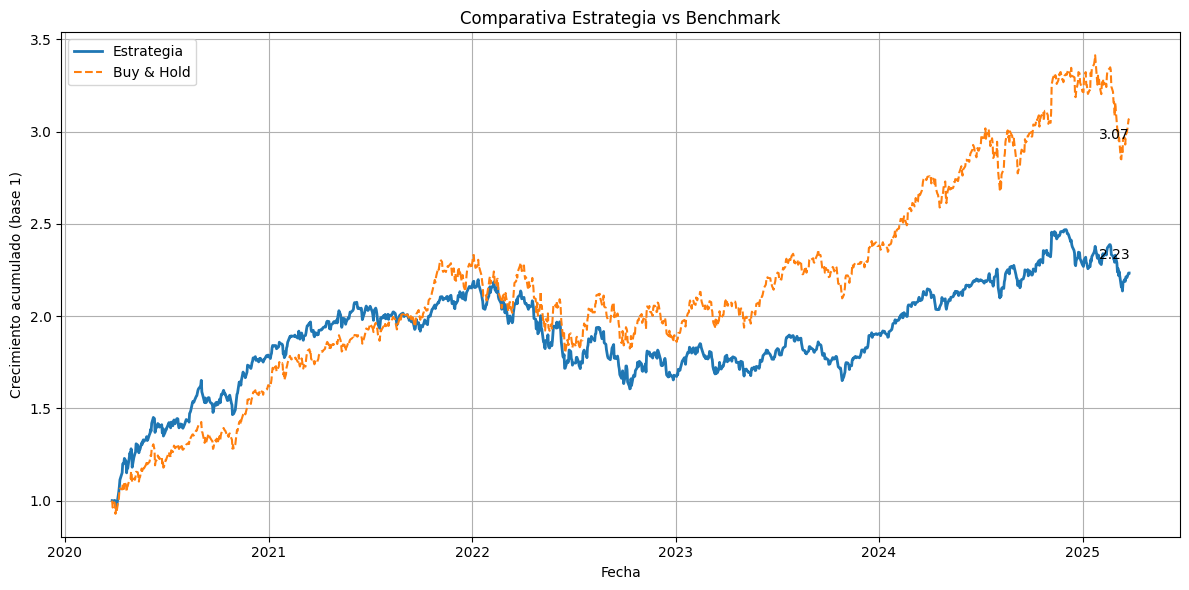

Retorno Estrategia: 123.36%
Retorno Benchmark: 207.08%
Alpha (diario): -0.00006
Beta: 0.79
Correlación: 0.88

Comparativa con benchmark para SOCIAL:


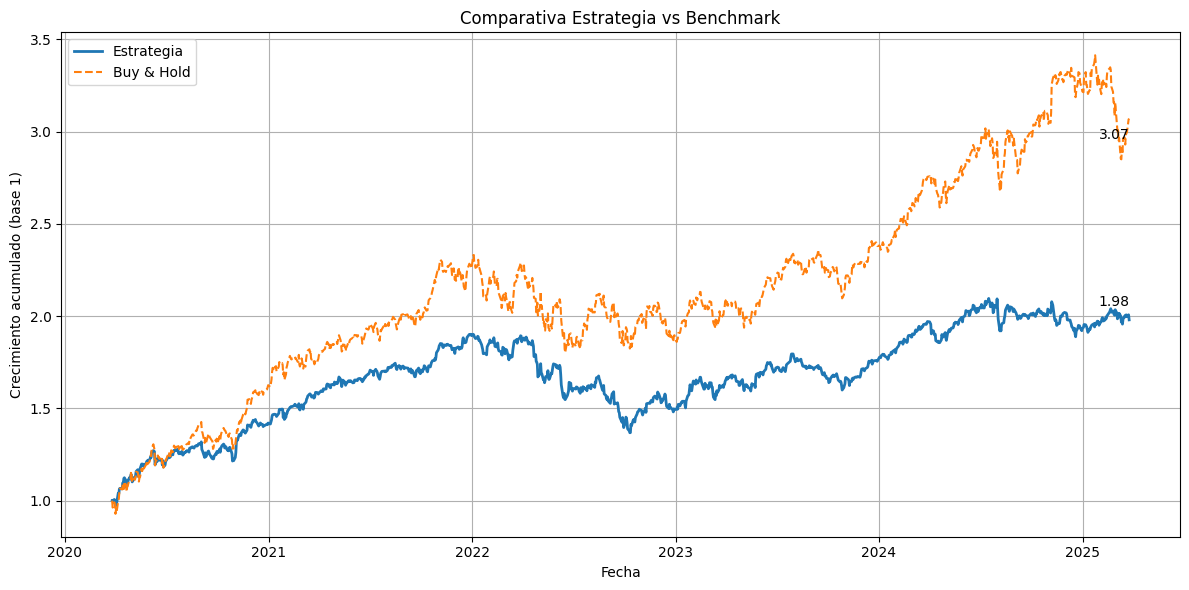

Retorno Estrategia: 97.98%
Retorno Benchmark: 207.08%
Alpha (diario): -0.00000
Beta: 0.60
Correlación: 0.82

Comparativa con benchmark para GOVERNANCE:


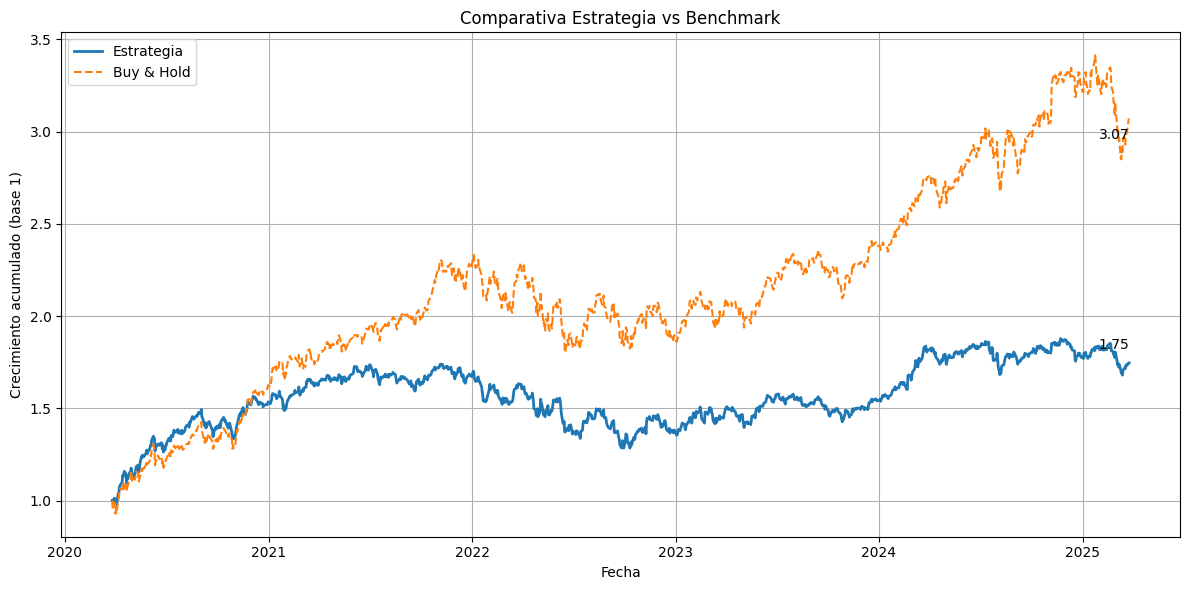

Retorno Estrategia: 74.67%
Retorno Benchmark: 207.08%
Alpha (diario): -0.00020
Beta: 0.71
Correlación: 0.88


In [ ]:
for categoria in categorias_esg:
    print(f"\nComparativa con benchmark para {categoria.upper()}:")
    df_comparacion = comparar_con_benchmark(
        historial_por_categoria[categoria],
        trades_por_categoria[categoria],
        prices
    )

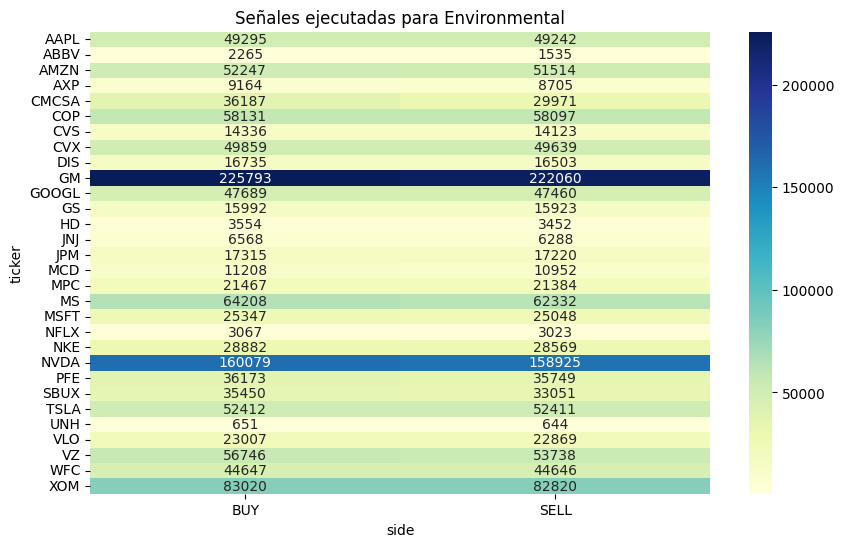

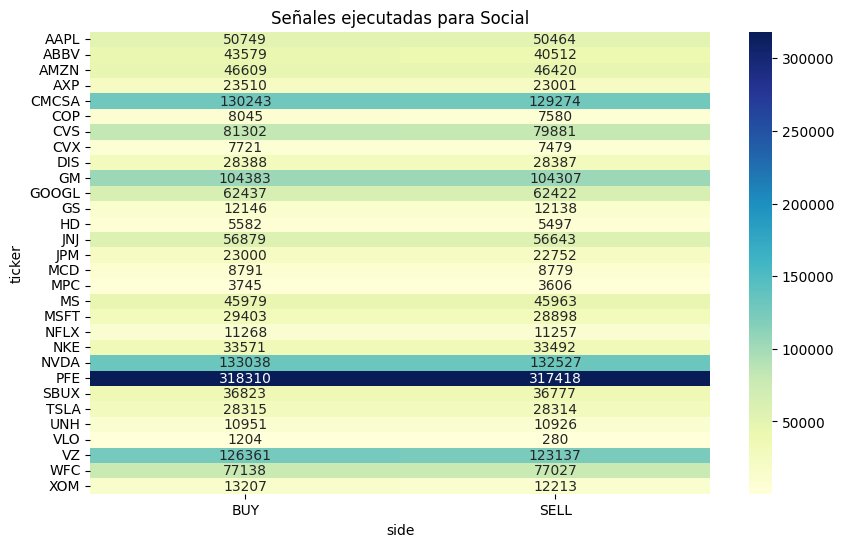

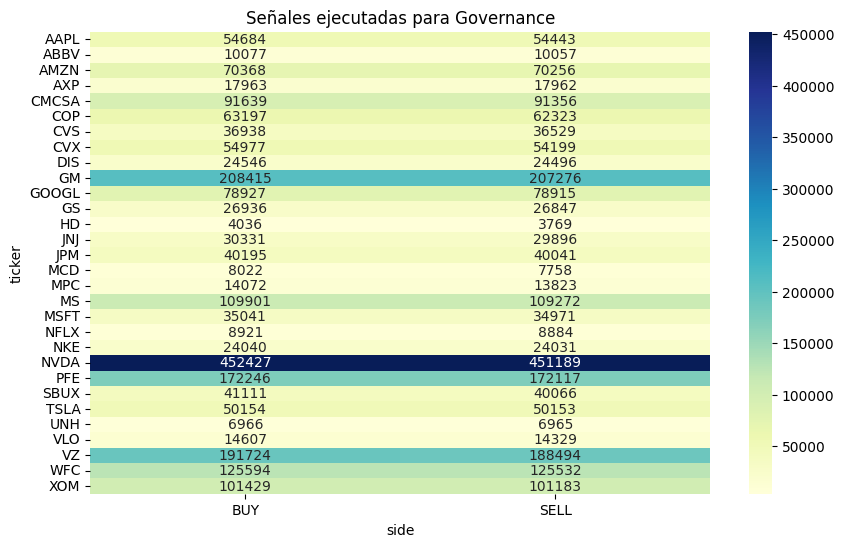

In [ ]:
import seaborn as sns

for categoria in categorias_esg:
    df_trades = trades_por_categoria[categoria]
    pivot = df_trades.pivot_table(index='ticker', columns='side', values='shares', aggfunc='sum', fill_value=0)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu')
    plt.title(f"Señales ejecutadas para {categoria.capitalize()}")
    plt.show()